In [101]:
# Importing those libraries we love
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Matrix multiplication

1.1: Multiplying matrices manually. If we are multiplying A and B (in this order), A needs to be of size xn and B of size ny. That is, the number of columns in A is the same number of rows in B. The resultant matrix will then be of size _xy_.

To multiply using the **dot product**, here's an example from Math is Fun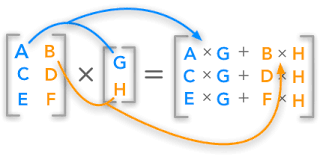 with a 3x2 and a 2x1 matrices.

Following the pattern above, we have the following resulting matrices:

(a) 

[1x1 + 2x2]

[3x1 + 4x2]

which is equal to

[5]

[11]

(b)

[1x1 -1x1, 1x0 -1x1]

[1x1 + 1x1, 1x0 + 1x1]

which is equal to

[0, -1]

[2, 1]

1.2: Checking the results:

In [102]:
# (a)
A = np.array([[1, 2], [3, 4]])
B = np.array([[1], [2]])
A @ B

array([[ 5],
       [11]])

In [103]:
# (b)
A = np.array([[1, -1], [1, 1]])
B = np.array([[1, 0], [1, 1]])
A @ B

array([[ 0, -1],
       [ 2,  1]])

We managed to get the matrices multiplication output for cases (a) and (b) both manually and with NumPy!

### 2. Linear transformation of images

In [104]:
A = np.array([[0, 0], [0, 2], [1, 1]])
A

array([[0, 0],
       [0, 2],
       [1, 1]])

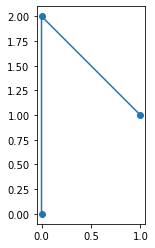

In [105]:
# Plot the image
ax = plt.subplot(1, 1, 1)
ax.plot(A[:,0], A[:,1], marker='o')
ax.set_aspect("equal")

#### 2.1 Rotate Objects

(a) 45o

In [106]:
# Source: https://scipython.com/book/chapter-6-numpy/examples/creating-a-rotation-matrix-in-numpy/

# 45o
theta = np.radians(45)
# rotation matrix
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c, -s), (s, c)))
A@R

array([[0.        , 0.        ],
       [1.41421356, 1.41421356],
       [1.41421356, 0.        ]])

(b) -225o

In [107]:
# -225o
theta = np.radians(-225)
# rotation matrix
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c, -s), (s, c)))
A@R

array([[ 0.00000000e+00,  0.00000000e+00],
       [ 1.41421356e+00, -1.41421356e+00],
       [-2.22044605e-16, -1.41421356e+00]])

(c) 30o

In [108]:
# 30o
theta = np.radians(30)
# rotation matrix
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c, -s), (s, c)))
A@R

array([[0.        , 0.        ],
       [1.        , 1.73205081],
       [1.3660254 , 0.3660254 ]])

2.1.2. Let's use matrix A as the object of my choice

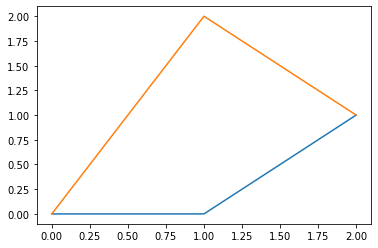

In [109]:
plt.plot(A)

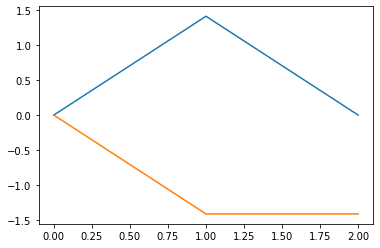

In [110]:
# Plotting some rotations

# -225o
theta = np.radians(-225)
# rotation matrix
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c, -s), (s, c)))
plt.plot(A@R)

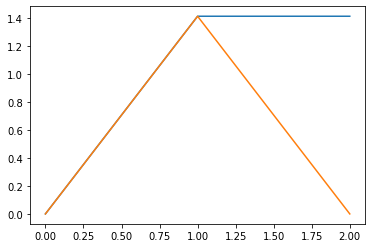

In [111]:
# 45o
theta = np.radians(45)
# rotation matrix
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c, -s), (s, c)))
plt.plot(A@R)

### 2.2 Rotate More Complex Images

2.1 Reading the data

In [112]:
crazy_hat = pd.read_csv("./Downloads/crazy-hat.tsv", sep="\t")
crazy_hat

,x,y,group
0,0,22,outline
1,16,-18,outline
2,-16,-18,outline
3,0,22,outline
4,-3,7,leye
5,-3,14,leye
6,2,7,reye
7,2,14,reye
8,-11,-10,mouth
9,-7,-17,mouth


In [113]:
crazy_hat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
x        15 non-null int64
y        15 non-null int64
group    15 non-null object
dtypes: int64(2), object(1)
memory usage: 488.0+ bytes


2.2 Plotting this crazy hat

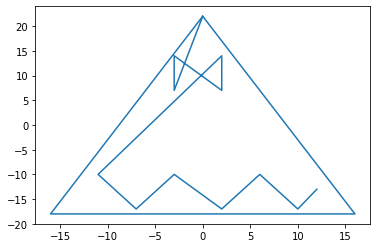

In [114]:
plt.plot(crazy_hat.x, crazy_hat.y)

2.3 Some rotations!

In [128]:
# Transforms our data points into a matrix
crazy_matrix = crazy_hat[['x', 'y']].to_numpy()
crazy_matrix

array([[  0,  22],
       [ 16, -18],
       [-16, -18],
       [  0,  22],
       [ -3,   7],
       [ -3,  14],
       [  2,   7],
       [  2,  14],
       [-11, -10],
       [ -7, -17],
       [ -3, -10],
       [  2, -17],
       [  6, -10],
       [ 10, -17],
       [ 12, -13]], dtype=int64)

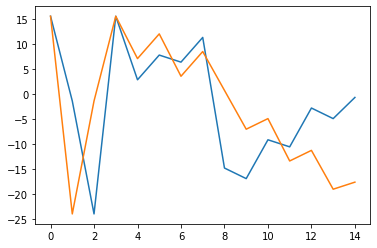

In [129]:
# 45o
theta = np.radians(45)
# rotation matrix
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c, -s), (s, c)))
plt.plot(crazy_matrix@R)

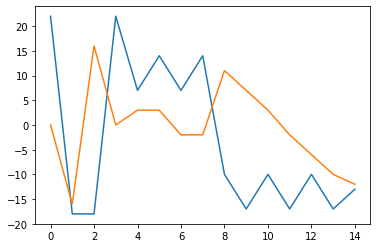

In [130]:
# 90o
theta = np.radians(90)
# rotation matrix
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c, -s), (s, c)))
plt.plot(crazy_matrix@R)

### 2.3 Arbitrary Transformation

In [133]:
arb_matrix = np.array([[21, 17], [34, 92]])
# Multiplying it
crazy_matrix@arb_matrix

array([[  748,  2024],
       [ -276, -1384],
       [ -948, -1928],
       [  748,  2024],
       [  175,   593],
       [  413,  1237],
       [  280,   678],
       [  518,  1322],
       [ -571, -1107],
       [ -725, -1683],
       [ -403,  -971],
       [ -536, -1530],
       [ -214,  -818],
       [ -368, -1394],
       [ -190,  -992]], dtype=int64)

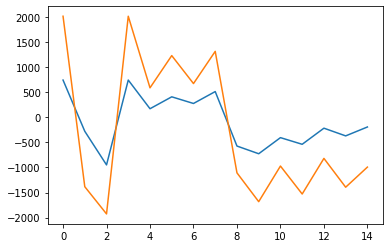

In [134]:
# Plotting it
plt.plot(crazy_matrix@arb_matrix)

### 3. Linear Regression

In [118]:
ccpp = pd.read_csv("./Downloads/ccpp.csv.bz2", sep="\t")
ccpp.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [119]:
ccpp.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


#### Temperature, C (AT)

Text(0, 0.5, 'Net hourly energy output, MW')

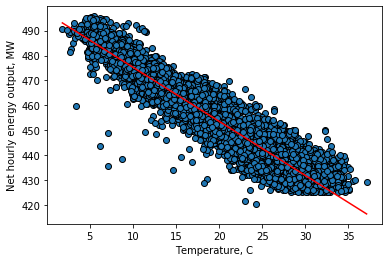

In [120]:
import statsmodels.formula.api as smf
m = smf.ols(formula='PE ~ AT', data=ccpp).fit()
x = np.linspace(ccpp.AT.min(), ccpp.AT.max(), 10)
y_hat = m.params[0] + m.params[1]*x
plt.scatter(ccpp.AT, ccpp.PE, edgecolor='k')
plt.plot(x, y_hat, c='red')
plt.xlabel('Temperature, C')
plt.ylabel('Net hourly energy output, MW')

In [121]:
m.params

Intercept    497.03412
AT            -2.17132
dtype: float64

Downward sloping line, so a negative correlation between temperature and the net hourly energy output. This is statistical significant as there is a correlation between both variables, as the slope is not 0.

An increase in AT correlates with a decrease in PE.

#### Ambient Pressure, millibar (AP)

Text(0, 0.5, 'Net hourly energy output, MW')

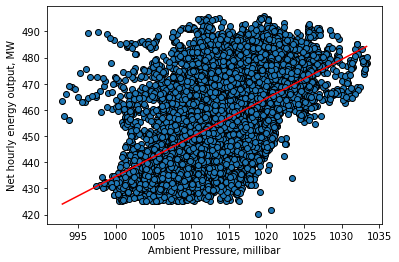

In [122]:
m = smf.ols(formula='PE ~ AP', data=ccpp).fit()
x = np.linspace(ccpp.AP.min(), ccpp.AP.max(), 10)
y_hat = m.params[0] + m.params[1]*x
plt.scatter(ccpp.AP, ccpp.PE, edgecolor='k')
plt.plot(x, y_hat, c='red')
plt.xlabel('Ambient Pressure, millibar')
plt.ylabel('Net hourly energy output, MW')

In [123]:
m.params

Intercept   -1055.260989
AP              1.489872
dtype: float64

The line is upward sloping (which we already knew as we got a positive value for our beta 1 (m.params[1], which is the slope of our line).

There is a similar relationship with the dots. Most of them have an ambient pressure from 1000 to 1030. This is a statistically significant result as the slope is not 0, meaning there is a correlation between AP and PE. An increase in AP correlates with an increase in PE.

#### Exhaust Vacuum, cm Hg (V)

Text(0, 0.5, 'Net hourly energy output, MW')

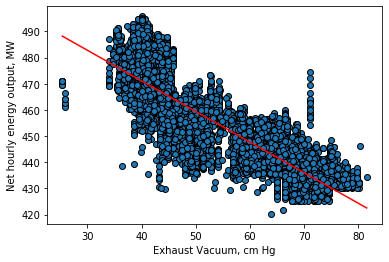

In [124]:
m = smf.ols(formula='PE ~ V', data=ccpp).fit()
x = np.linspace(ccpp.V.min(), ccpp.V.max(), 10)
y_hat = m.params[0] + m.params[1]*x
plt.scatter(ccpp.V, ccpp.PE, edgecolor='k')
plt.plot(x, y_hat, c='red')
plt.xlabel('Exhaust Vacuum, cm Hg')
plt.ylabel('Net hourly energy output, MW')

In [125]:
m.params

Intercept    517.801526
V             -1.168135
dtype: float64

Downward sloping line, so a negative correlation between temperature and the net hourly energy output. This is statistical significant as there is a correlation between both variables, as the slope is not 0.

An increase in V correlates with a decrease in PE.

#### Relative Humidity, % (RH)

Text(0, 0.5, 'Net hourly energy output, MW')

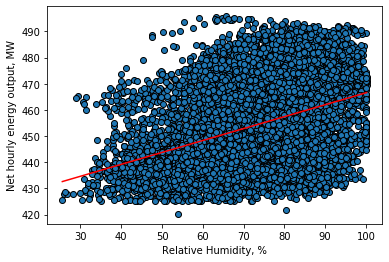

In [126]:
m = smf.ols(formula='PE ~ RH', data=ccpp).fit()
x = np.linspace(ccpp.RH.min(), ccpp.RH.max(), 10)
y_hat = m.params[0] + m.params[1]*x
plt.scatter(ccpp.RH, ccpp.PE, edgecolor='k')
plt.plot(x, y_hat, c='red')
plt.xlabel('Relative Humidity, %')
plt.ylabel('Net hourly energy output, MW')

In [127]:
m.params

Intercept    420.961766
RH             0.455650
dtype: float64

The line is upward sloping (which we already knew as we got a positive value for our beta 1 (m.params[1], which is the slope of our line). Even though our beta 1 value is closer to 0 than the one for the other variables analyzed, there is still a correlation between RH and PE. Therefore, RH is statistically significant.

An increase in RH correlates to an increase in PE.